In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
tweets = pd.read_csv("data/tweets_clean.csv", sep=';', decimal = ',', index_col=0)

In [3]:
def cleanTxt(text):
    text = re.sub(r'@\s\w+', '', text) #remove @mentions
    text = re.sub(r'#', '', text)    # remove hashtag symbol
    text = re.sub(r'RT[\s]+', '', text) # remove 'RT'
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    text = re.sub(r'pic.twitter.com\/\S+', '',text) #remove links images
    return text

def getYear(date):
    date = date.split('-')
    year = date[0]
    return year

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [4]:
tweets['content_clean'] = tweets['content'].apply(cleanTxt)
tweets['content_clean']

# tweets[tweets['content_clean'] != '']

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
43347    Joe Biden was a TOTAL FAILURE in Government. H...
43348    Will be interviewed on  tonight at 9:00 P.M. E...
43349                                                     
43350                                                     
43351                                                     
Name: content_clean, Length: 43352, dtype: object

In [5]:
tweets['year'] = tweets['YYYY-MM-DD'].apply(getYear)
tweets

date  YYYY-MM-DD  HH:MM:SS  \
0      2009-05-04 13:54:25  2009-05-04  13:54:25   
1      2009-05-04 20:00:10  2009-05-04  20:00:10   
2      2009-05-08 08:38:08  2009-05-08  08:38:08   
3      2009-05-08 15:40:15  2009-05-08  15:40:15   
4      2009-05-12 09:07:28  2009-05-12  09:07:28   
...                    ...         ...       ...   
43347  2020-06-17 19:00:32  2020-06-17  19:00:32   
43348  2020-06-17 19:11:47  2020-06-17  19:11:47   
43349  2020-06-17 21:27:33  2020-06-17  21:27:33   
43350  2020-06-17 21:28:38  2020-06-17  21:28:38   
43351  2020-06-17 21:28:52  2020-06-17  21:28:52   

                                                 content  engagement  \
0      Be sure to tune in and watch Donald Trump on L...        1427   
1      Donald Trump will be appearing on The View tom...         301   
2      Donald Trump reads Top Ten Financial Tips on L...          32   
3      New Blog Post: Celebrity Apprentice Finale and...          37   
4      "My persona will never be that of a wallflower...        3320   
...                                                  ...         ...   
43347  Joe Biden was a TOTAL FAILURE in Government. H...      139779   
43348  Will be interviewed on @ seanhannity tonight a...       68469   
43349                         pic.twitter.com/3lm1spbU8X       24303   
43350                         pic.twitter.com/vpCE5MadUz       21649   
43351                         pic.twitter.com/VLlc0BHW41       18295   

       retweets  favorites      mentions hashtags  \
0           510        917           NaN      NaN   
1            34        267           NaN      NaN   
2            13         19           NaN      NaN   
3            11         26           NaN      NaN   
4          1375       1945           NaN      NaN   
...         ...        ...           ...      ...   
43347     23402     116377           NaN      NaN   
43348     11810      56659  @seanhannity      NaN   
43349      4959      19344           NaN      NaN   
43350      4627      17022           NaN      NaN   
43351      3951      14344           NaN      NaN   

                                                    link                   id  \
0      https://twitter.com/realDonaldTrump/status/169...           1698308935   
1      https://twitter.com/realDonaldTrump/status/170...           1701461182   
2      https://twitter.com/realDonaldTrump/status/173...           1737479987   
3      https://twitter.com/realDonaldTrump/status/174...           1741160716   
4      https://twitter.com/realDonaldTrump/status/177...           1773561338   
...                                                  ...                  ...   
43347  https://twitter.com/realDonaldTrump/status/127...  1273405198698975232   
43348  https://twitter.com/realDonaldTrump/status/127...  1273408026968457216   
43349  https://twitter.com/realDonaldTrump/status/127...  1273442195161387008   
43350  https://twitter.com/realDonaldTrump/status/127...  1273442469066276864   
43351  https://twitter.com/realDonaldTrump/status/127...  1273442528411385858   

                                           content_clean  year  
0      Be sure to tune in and watch Donald Trump on L...  2009  
1      Donald Trump will be appearing on The View tom...  2009  
2      Donald Trump reads Top Ten Financial Tips on L...  2009  
3      New Blog Post: Celebrity Apprentice Finale and...  2009  
4      "My persona will never be that of a wallflower...  2009  
...                                                  ...   ...  
43347  Joe Biden was a TOTAL FAILURE in Government. H...  2020  
43348  Will be interviewed on  tonight at 9:00 P.M. E...  2020  
43349                                                     2020  
43350                                                     2020  
43351                                                     2020  

[43352 rows x 13 columns]

In [6]:
tweets['subjectivity'] = tweets['content_clean'].apply(getSubjectivity)
tweets['polarity'] = tweets['content_clean'].apply(getPolarity)
tweets

date  YYYY-MM-DD  HH:MM:SS  \
0      2009-05-04 13:54:25  2009-05-04  13:54:25   
1      2009-05-04 20:00:10  2009-05-04  20:00:10   
2      2009-05-08 08:38:08  2009-05-08  08:38:08   
3      2009-05-08 15:40:15  2009-05-08  15:40:15   
4      2009-05-12 09:07:28  2009-05-12  09:07:28   
...                    ...         ...       ...   
43347  2020-06-17 19:00:32  2020-06-17  19:00:32   
43348  2020-06-17 19:11:47  2020-06-17  19:11:47   
43349  2020-06-17 21:27:33  2020-06-17  21:27:33   
43350  2020-06-17 21:28:38  2020-06-17  21:28:38   
43351  2020-06-17 21:28:52  2020-06-17  21:28:52   

                                                 content  engagement  \
0      Be sure to tune in and watch Donald Trump on L...        1427   
1      Donald Trump will be appearing on The View tom...         301   
2      Donald Trump reads Top Ten Financial Tips on L...          32   
3      New Blog Post: Celebrity Apprentice Finale and...          37   
4      "My persona will never be that of a wallflower...        3320   
...                                                  ...         ...   
43347  Joe Biden was a TOTAL FAILURE in Government. H...      139779   
43348  Will be interviewed on @ seanhannity tonight a...       68469   
43349                         pic.twitter.com/3lm1spbU8X       24303   
43350                         pic.twitter.com/vpCE5MadUz       21649   
43351                         pic.twitter.com/VLlc0BHW41       18295   

       retweets  favorites      mentions hashtags  \
0           510        917           NaN      NaN   
1            34        267           NaN      NaN   
2            13         19           NaN      NaN   
3            11         26           NaN      NaN   
4          1375       1945           NaN      NaN   
...         ...        ...           ...      ...   
43347     23402     116377           NaN      NaN   
43348     11810      56659  @seanhannity      NaN   
43349      4959      19344           NaN      NaN   
43350      4627      17022           NaN      NaN   
43351      3951      14344           NaN      NaN   

                                                    link                   id  \
0      https://twitter.com/realDonaldTrump/status/169...           1698308935   
1      https://twitter.com/realDonaldTrump/status/170...           1701461182   
2      https://twitter.com/realDonaldTrump/status/173...           1737479987   
3      https://twitter.com/realDonaldTrump/status/174...           1741160716   
4      https://twitter.com/realDonaldTrump/status/177...           1773561338   
...                                                  ...                  ...   
43347  https://twitter.com/realDonaldTrump/status/127...  1273405198698975232   
43348  https://twitter.com/realDonaldTrump/status/127...  1273408026968457216   
43349  https://twitter.com/realDonaldTrump/status/127...  1273442195161387008   
43350  https://twitter.com/realDonaldTrump/status/127...  1273442469066276864   
43351  https://twitter.com/realDonaldTrump/status/127...  1273442528411385858   

                                           content_clean  year  subjectivity  \
0      Be sure to tune in and watch Donald Trump on L...  2009      0.497222   
1      Donald Trump will be appearing on The View tom...  2009      0.454545   
2      Donald Trump reads Top Ten Financial Tips on L...  2009      0.420000   
3      New Blog Post: Celebrity Apprentice Finale and...  2009      0.454545   
4      "My persona will never be that of a wallflower...  2009      0.000000   
...                                                  ...   ...           ...   
43347  Joe Biden was a TOTAL FAILURE in Government. H...  2020      0.525000   
43348  Will be interviewed on  tonight at 9:00 P.M. E...  2020      0.500000   
43349                                                     2020      0.000000   
43350                                                     2020      0.000000   
43351                                     

In [7]:
tweets = tweets[tweets['content_clean']!='']

In [8]:
tweets.to_csv('data/sentiment_tweets.csv', sep=';', decimal=',')

2009



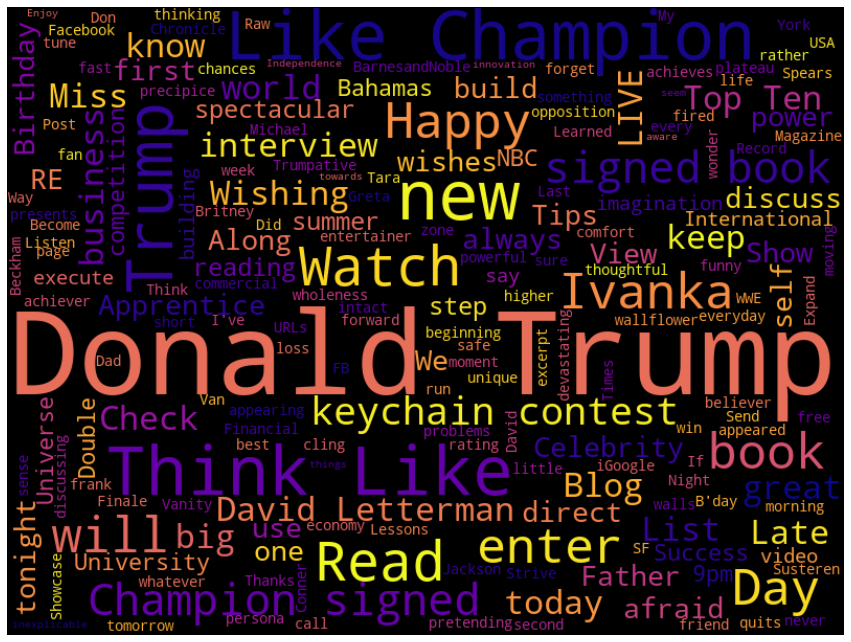



2010



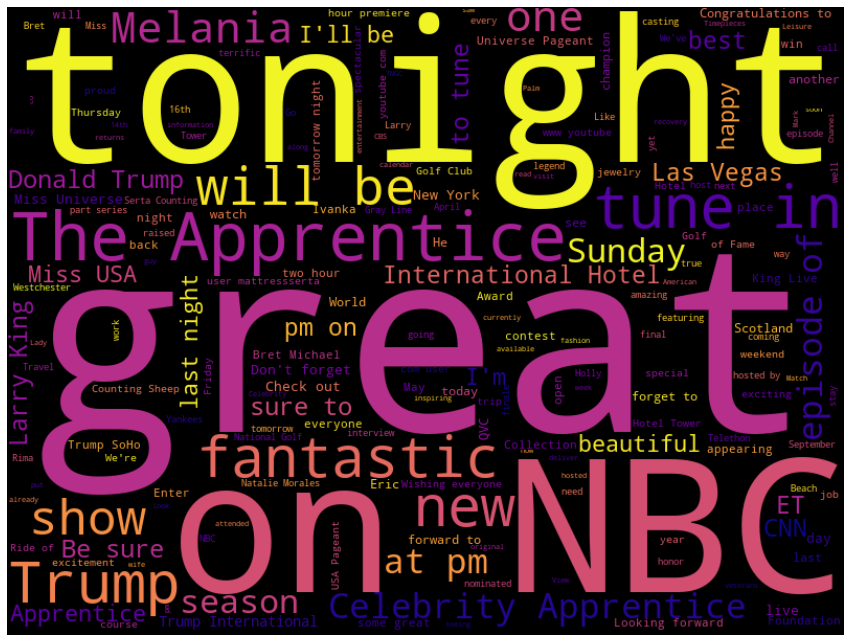



2011



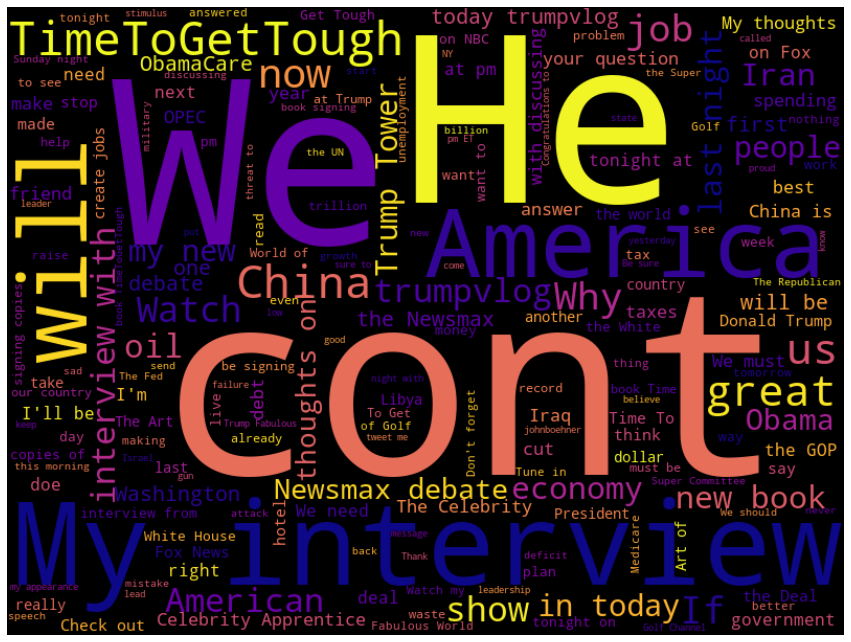



2012



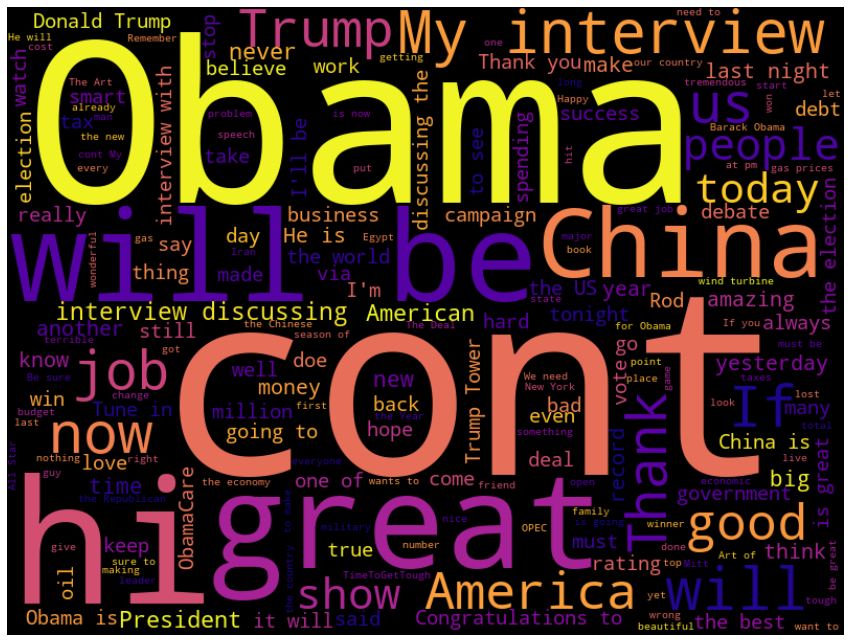



2013



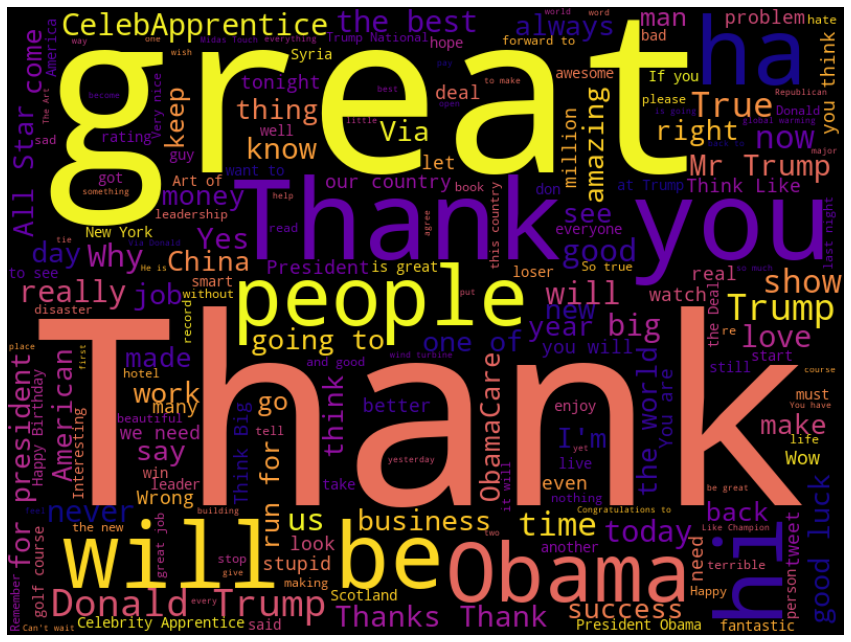



2014



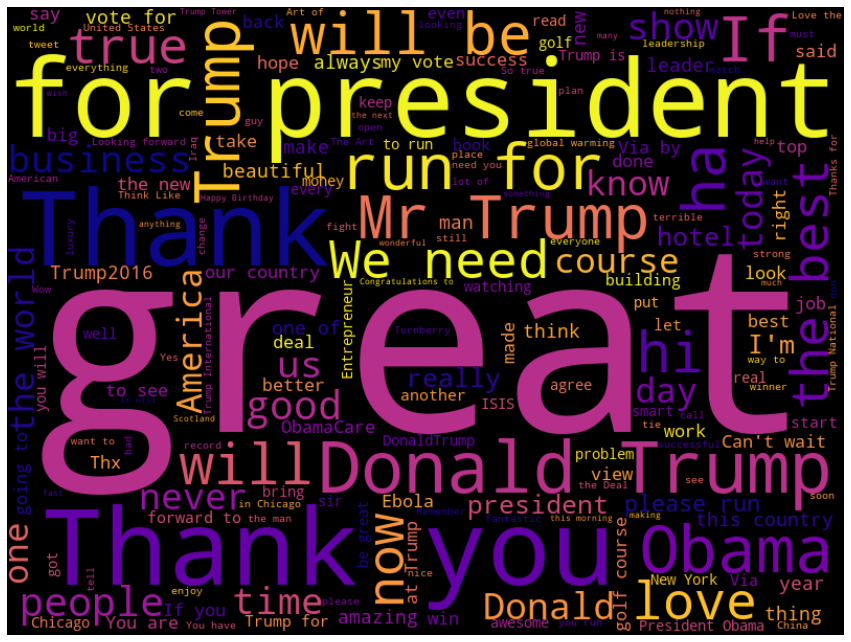



2015



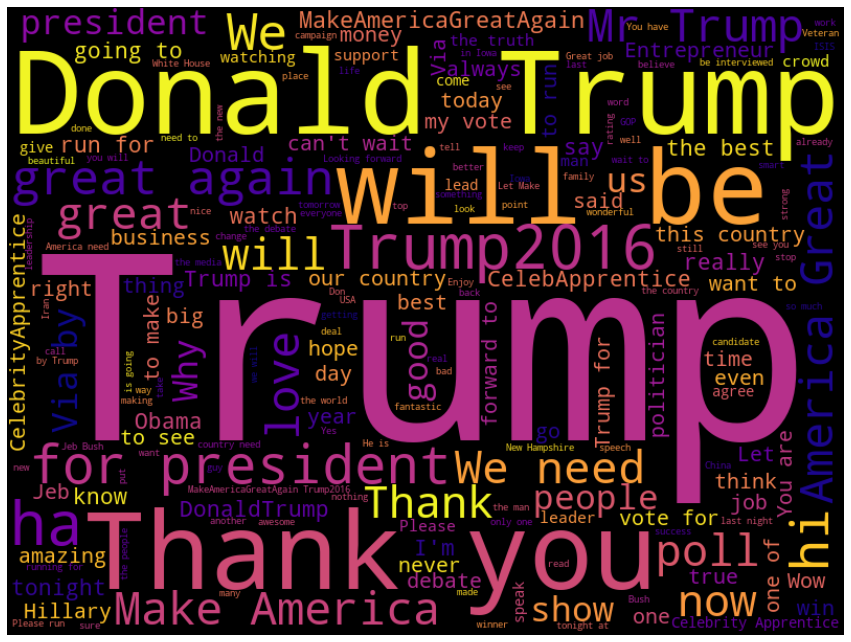



2016



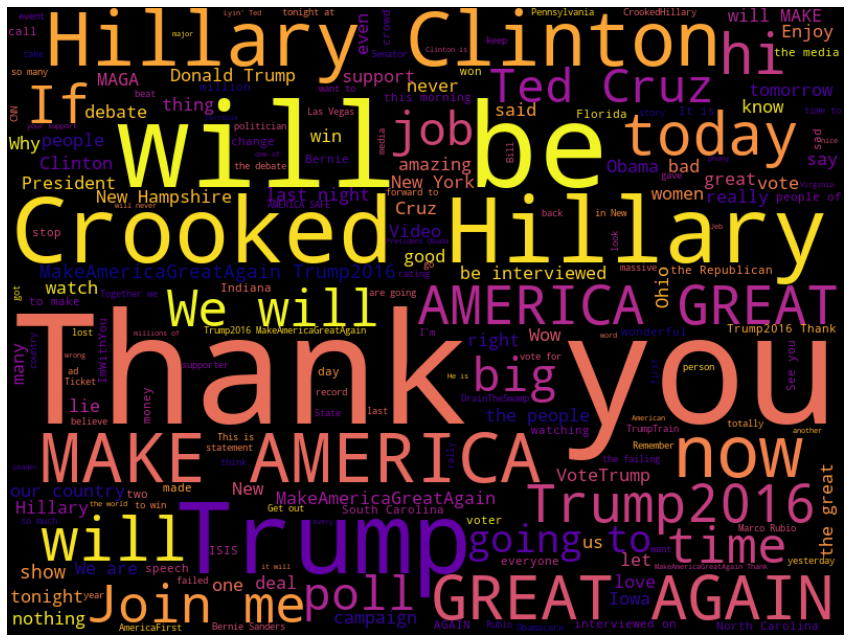



2017



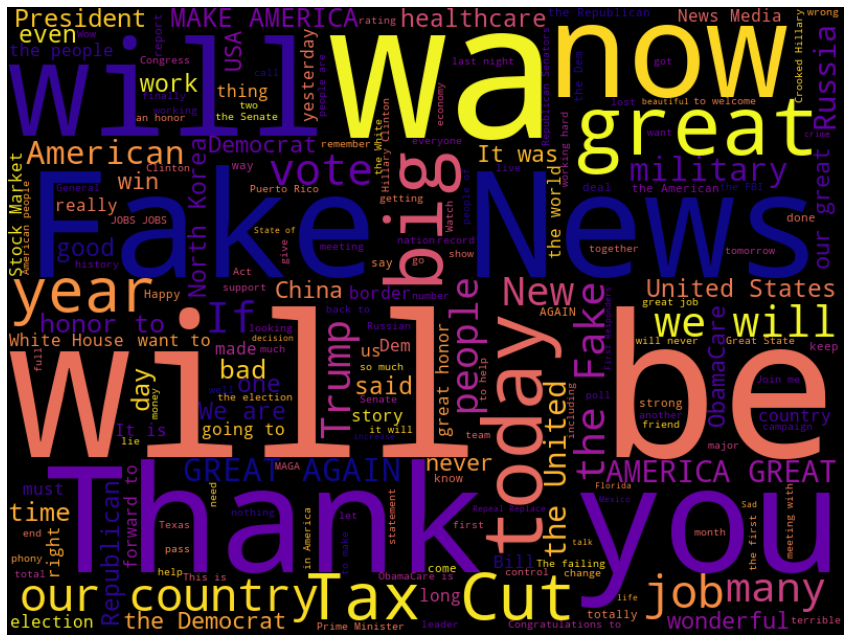



2018



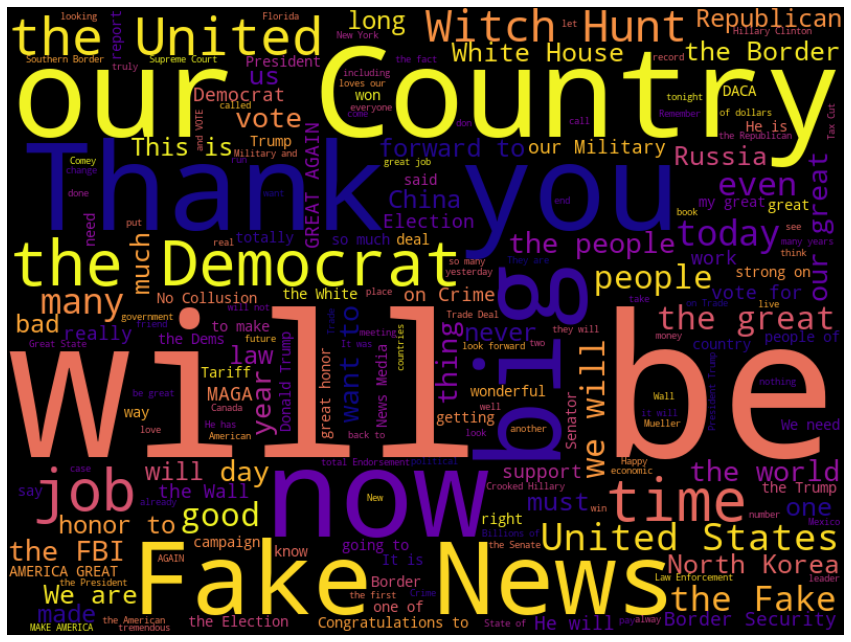



2019



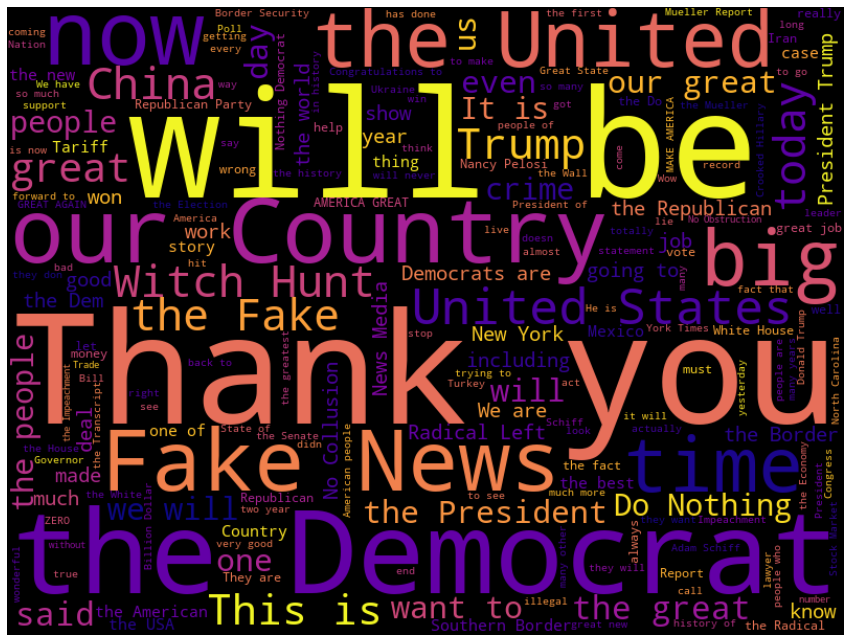



2020



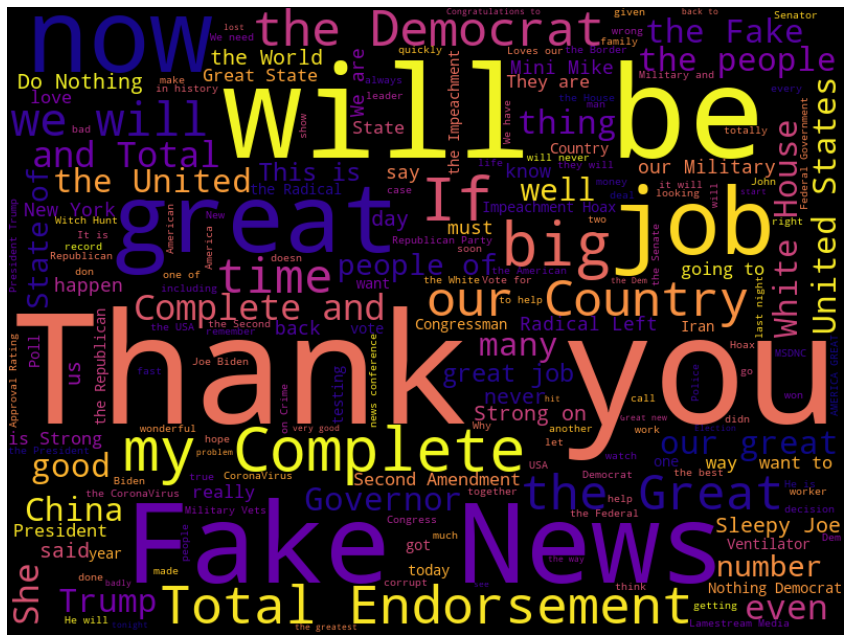

In [9]:
for year in range(2009,2021):
    allWords = ' '.join([twts for twts in tweets[tweets['year'] == str(year)]['content_clean']])
    wordCloud = WordCloud(width = 800, height = 600, random_state=21, colormap = 'plasma', max_font_size = 250).generate(allWords)
    fig,ax = plt.subplots(figsize = (15,15))
    plt.imshow(wordCloud, interpolation = "bilinear")
    plt.axis('off')
    plt.margins(x=0, y=0)
    print(str(year)+'\n')
    plt.show()
    print('\n')